## 09 데이터분석 프로젝트

In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [222]:
# PC에서 그림 설정
plt.rcParams.update({'figure.dpi': '100'})
plt.rcParams.update({'figure.figsize': [4, 2.5]})

In [223]:
# PC에서 한글 설정
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [224]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

In [225]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [226]:
!git clone https://github.com/ai7dnn/data

fatal: destination path 'data' already exists and is not an empty directory.


In [227]:
!pip install pyreadstat

In [228]:
raw_welfare = pd.read_spss('data/Koweps_hpwc14_2019_beta2.sav')
raw_welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,2.01e+04,0.0,NaN,0.29,0.29,1307.76,1307.76,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,3.01e+04,0.0,NaN,0.42,0.42,1882.57,1882.57,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,4.01e+04,0.0,NaN,0.27,0.27,1189.69,1192.91,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,6.01e+04,0.0,NaN,0.49,0.50,2219.63,2224.27,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,6.01e+04,0.0,NaN,1.02,1.02,4565.39,4565.39,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,9.80e+07,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [229]:
raw_welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [230]:
welfare = raw_welfare.copy()

In [231]:
welfare.shape

(14418, 830)

In [232]:
welfare = welfare.rename(columns= {'h14_g3' : 'sex', 
                                   'h14_g4' : 'birth', 
                                   'h14_g10' : 'marriage_type', 
                                   'h14_g11' : 'religion', 
                                   'p1402_8aq1' : 'income', 
                                   'h14_eco9' : 'code_job', 
                                   'h14_reg7' : 'code_region'})
welfare['sex']

0        2.0
1        1.0
2        1.0
3        1.0
4        2.0
        ... 
14413    2.0
14414    2.0
14415    1.0
14416    2.0
14417    1.0
Name: sex, Length: 14418, dtype: float64

In [233]:
welfare.sex.dtypes

dtype('float64')

In [234]:
welfare.sex.value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [235]:
welfare.sex.isna().sum()

0

In [236]:
welfare['sex'] = np.where(welfare.sex == 1, 'male', 'female')
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

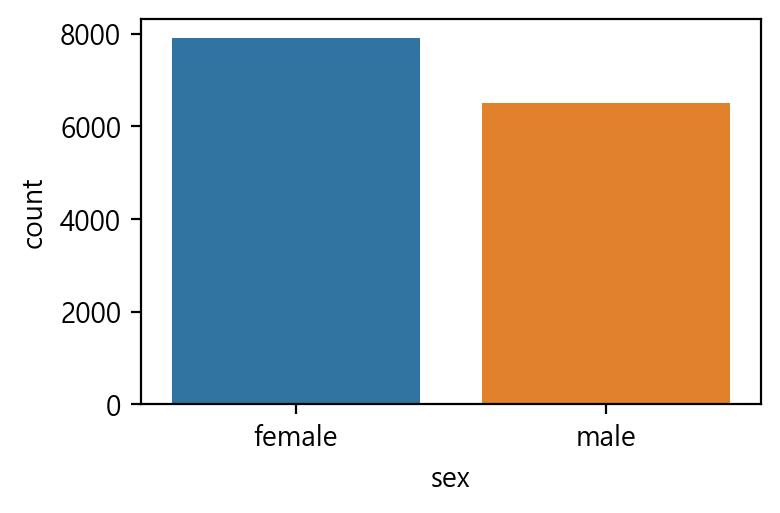

In [237]:
sns.countplot(welfare, x='sex', hue='sex')

## 11주차 수업

In [238]:
welfare['income'].dtypes

dtype('float64')

In [239]:
welfare['income'].describe()

count    4534.00
mean      268.46
std       198.02
min         0.00
25%       150.00
50%       220.00
75%       345.75
max      1892.00
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

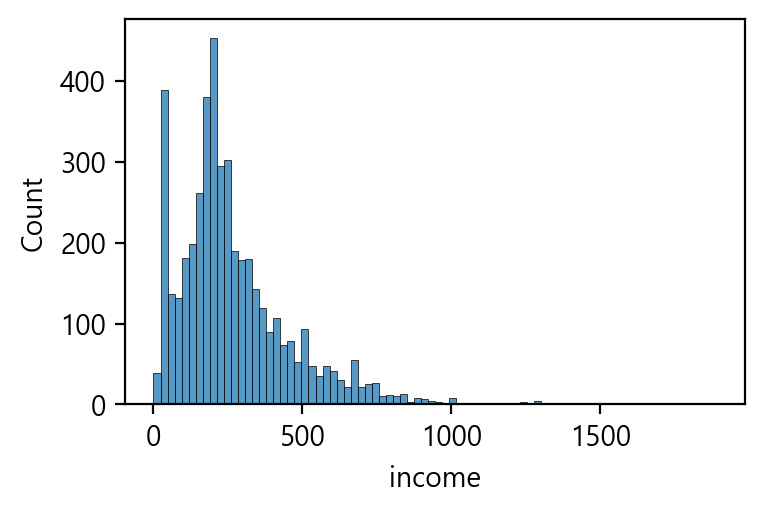

In [240]:
sns.histplot(welfare, x = 'income')

In [241]:
welfare['income'].isna().sum()

9884

In [242]:
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.29
1,male,349.04


In [243]:
sex_income = welfare.groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.29
1,male,349.04


<Axes: xlabel='sex', ylabel='mean_income'>

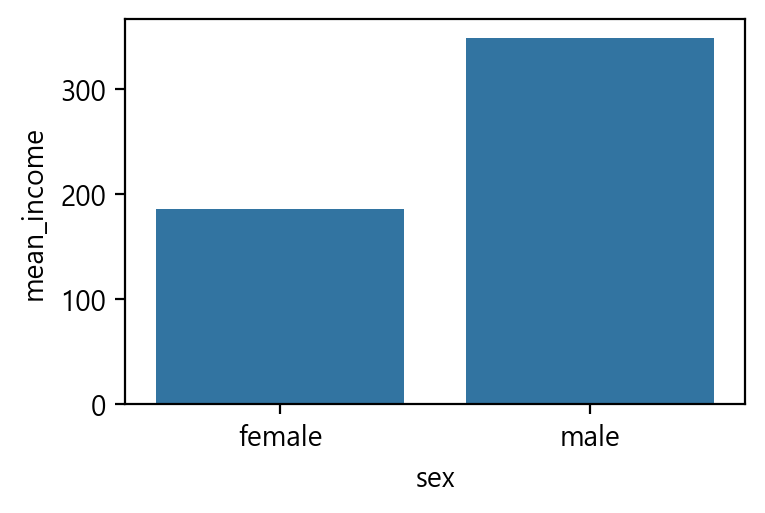

In [244]:
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income')

## 나이와 월급의 관계

In [245]:
welfare['birth'].dtypes

dtype('float64')

In [246]:
welfare['birth'].describe()

count    14418.00
mean      1969.28
std         24.40
min       1907.00
25%       1948.00
50%       1968.00
75%       1990.00
max       2018.00
Name: birth, dtype: float64

<Axes: xlabel='birth', ylabel='Count'>

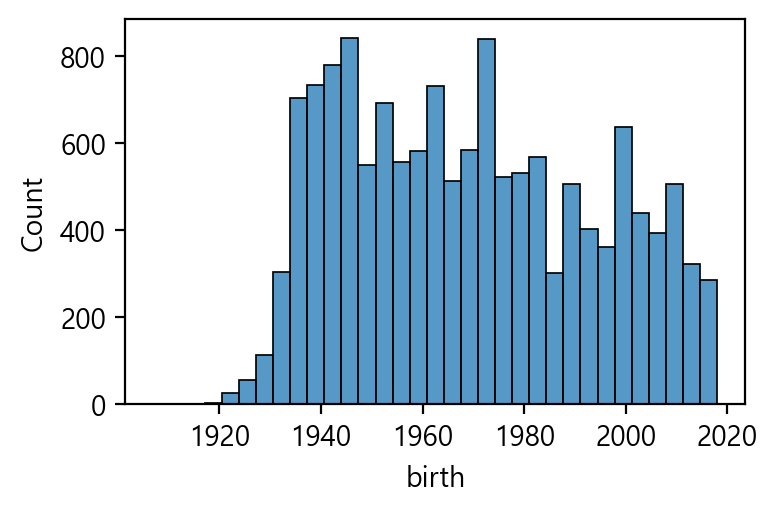

In [247]:
sns.histplot(data = welfare, x = 'birth')

In [248]:
welfare['birth'].isna().sum()

0

In [249]:
welfare = welfare.assign(age = 2025 - welfare['birth'])
welfare['age'].describe()      

count    14418.00
mean        55.72
std         24.40
min          7.00
25%         35.00
50%         57.00
75%         77.00
max        118.00
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

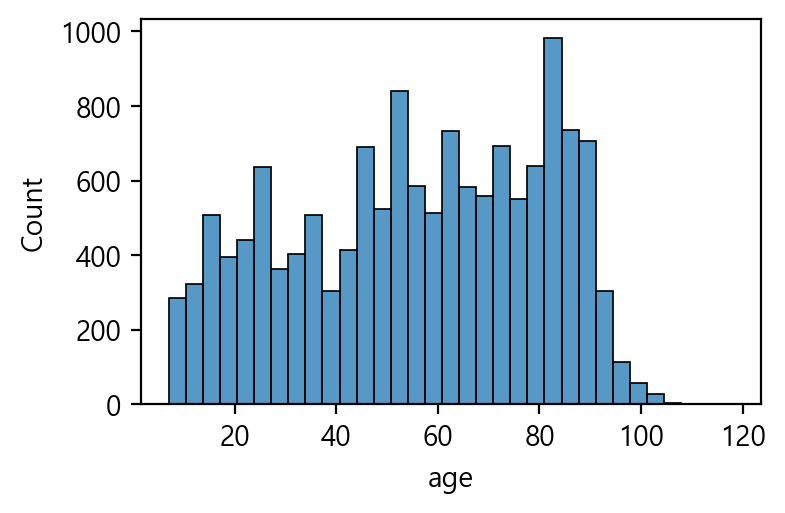

In [250]:
sns.histplot(data = welfare, x = 'age')

In [251]:
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age') \
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
24.0,162.00
25.0,121.33
26.0,136.40
27.0,123.67
28.0,179.68


<Axes: xlabel='age', ylabel='mean_income'>

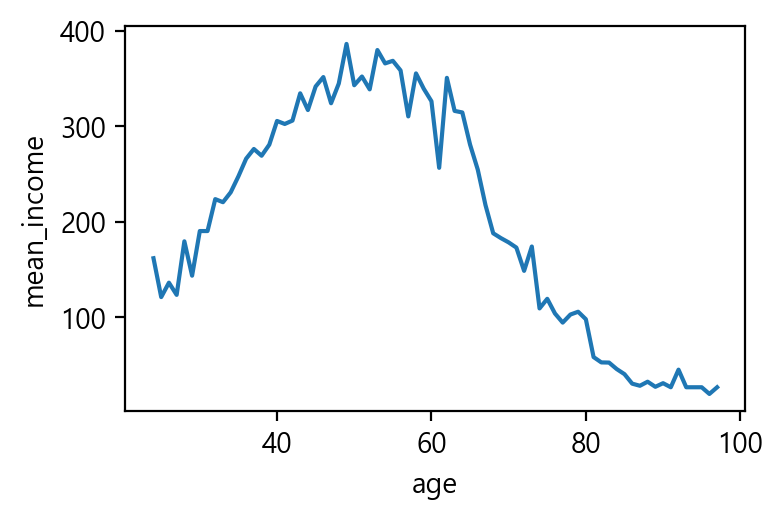

In [252]:
sns.lineplot(data = age_income, x = 'age', y = 'mean_income')  

In [253]:
welfare = welfare.assign(ageg = np.where(welfare['age'] <  30, 'young',
                                np.where(welfare['age'] <= 59, 'middle', 'old')))

In [254]:
welfare['ageg'].value_counts()

ageg
old       6861
middle    4744
young     2813
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

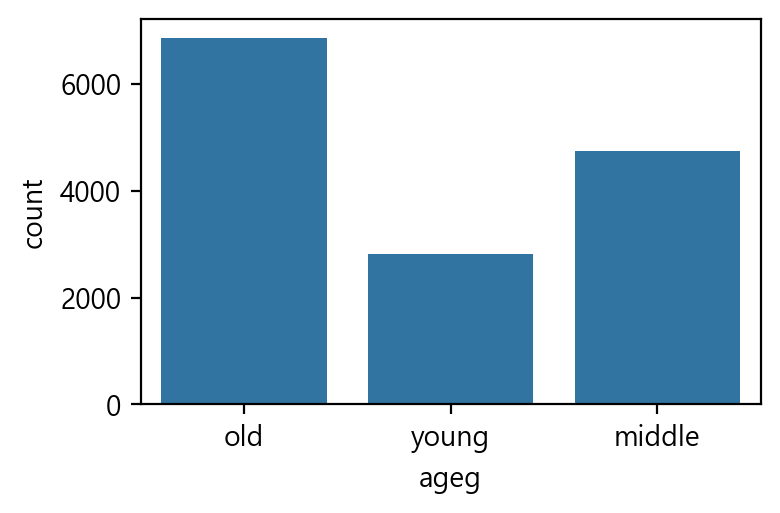

In [255]:
sns.countplot(welfare, x = 'ageg')

## 연령대에 따른 월급 차이 분석

In [256]:

ageg_income = welfare.dropna(subset = ['income']) \
                    .groupby('ageg') \
                    .agg(mean_income = ('income', 'mean'))
ageg_income

,mean_income
ageg,
middle,315.91
old,189.14
young,146.85


<Axes: xlabel='ageg', ylabel='mean_income'>

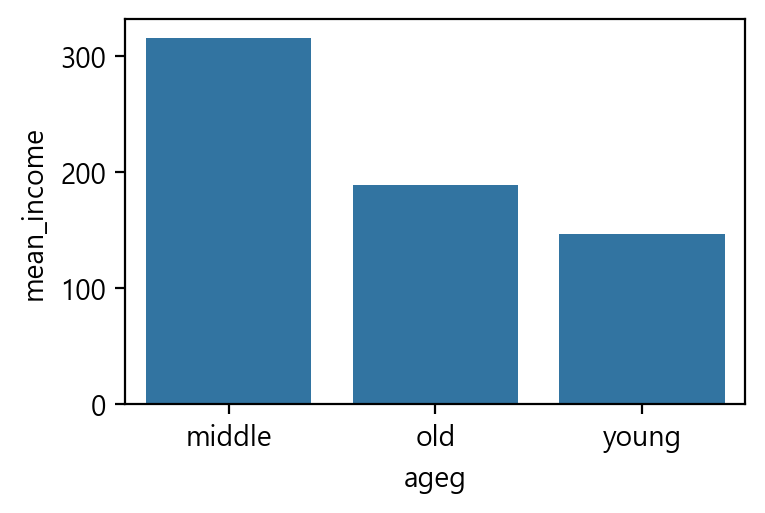

In [257]:
sns.barplot(ageg_income, x = 'ageg', y = 'mean_income')

## 연령대 및 성별 월급 차이 분석하기

In [258]:
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby(['ageg', 'sex'], as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,234.31
1,middle,male,384.39
2,old,female,115.41
3,old,male,277.32
4,young,female,144.13
5,young,male,156.31


<Axes: xlabel='ageg', ylabel='mean_income'>

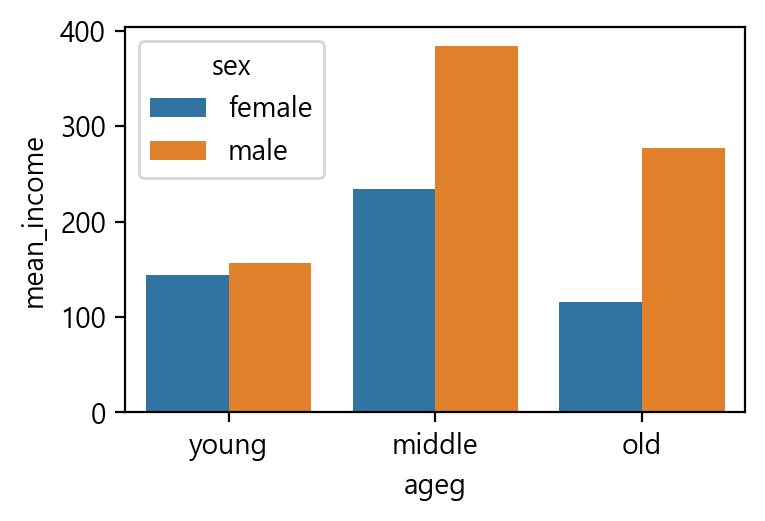

In [259]:
sns.barplot(sex_income, x = 'ageg', y = 'mean_income', hue = 'sex',
            order = ['young', 'middle', 'old'])

In [260]:
sex_age = welfare.dropna(subset = ['income']) \
                 .groupby(['age', 'sex'], as_index = False) \
                 .agg(mean_income = ('income', 'mean'))
sex_age.head()

,age,sex,mean_income
0,24.0,male,162.00
1,25.0,female,87.67
2,25.0,male,155.00
3,26.0,female,124.00
4,26.0,male,186.00


<Axes: xlabel='age', ylabel='mean_income'>

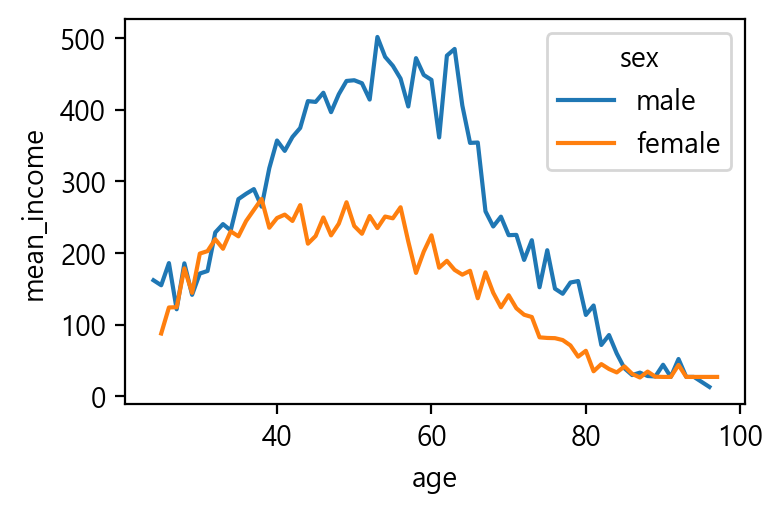

In [261]:
sns.lineplot(sex_age, x = 'age', y = 'mean_income', hue = 'sex')

## 직업별 월급 차이

In [262]:
welfare['code_job'].dtypes

dtype('float64')

In [263]:
welfare['code_job'].value_counts()

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [264]:
list_job = pd.read_excel('data/Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [265]:
list_job.shape

(156, 2)

In [266]:
welfare = welfare.merge(list_job, how = 'left', on = 'code_job')
welfare[['job']].head()

,job
0,NaN
1,NaN
2,전기공
3,금속기계 부품 조립원
4,NaN


In [267]:
welfare.dropna(subset = ['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [268]:
job_income = welfare.dropna(subset = ['job', 'income']) \
                    .groupby('job', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.46
1,간호사,265.22
2,감정∙기술영업및중개관련종사자,391.00
3,건물 관리원 및 검표원,168.38
4,건설 및 광업 단순 종사자,261.98


In [269]:
top10 = job_income.sort_values('mean_income', ascending = False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.00
60,법률 전문가,776.33
140,행정 및 경영 지원 관리자,771.83
63,보험 및 금융 관리자,734.75
110,재활용 처리 및 소각로 조작원,688.00
131,컴퓨터 하드웨어 및 통신공학 전문가,679.44
24,기계∙로봇공학 기술자 및 시험원,669.17
6,건설∙전기 및 생산 관련 관리자,603.08
120,제관원 및 판금원,597.00
100,의회 의원∙고위 공무원 및 공공단체 임원,580.50


<Axes: xlabel='mean_income', ylabel='job'>

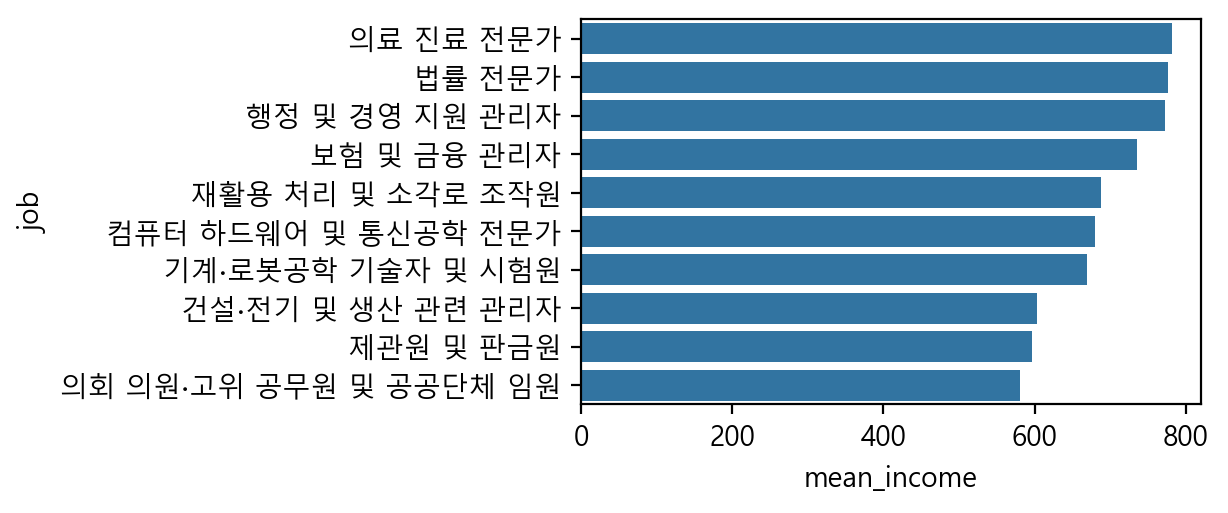

In [270]:
sns.barplot(top10, x = 'mean_income', y = 'job')

In [271]:
btm10 = job_income.sort_values('mean_income').head(10)
btm10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.96
34,기타 서비스 관련 단순 종사자,77.79
128,청소원 및 환경미화원,88.46
0,가사 및 육아 도우미,92.46
43,돌봄 및 보건 서비스 종사자,117.16
97,음식 관련 단순 종사자,118.19
39,농림∙어업 관련 단순 종사자,122.62
139,학예사∙사서 및 기록물 관리사,140.00
126,채굴 및 토목 관련 기능 종사자,140.00
135,판매 관련 단순 종사자,140.91


<Axes: xlabel='mean_income', ylabel='job'>

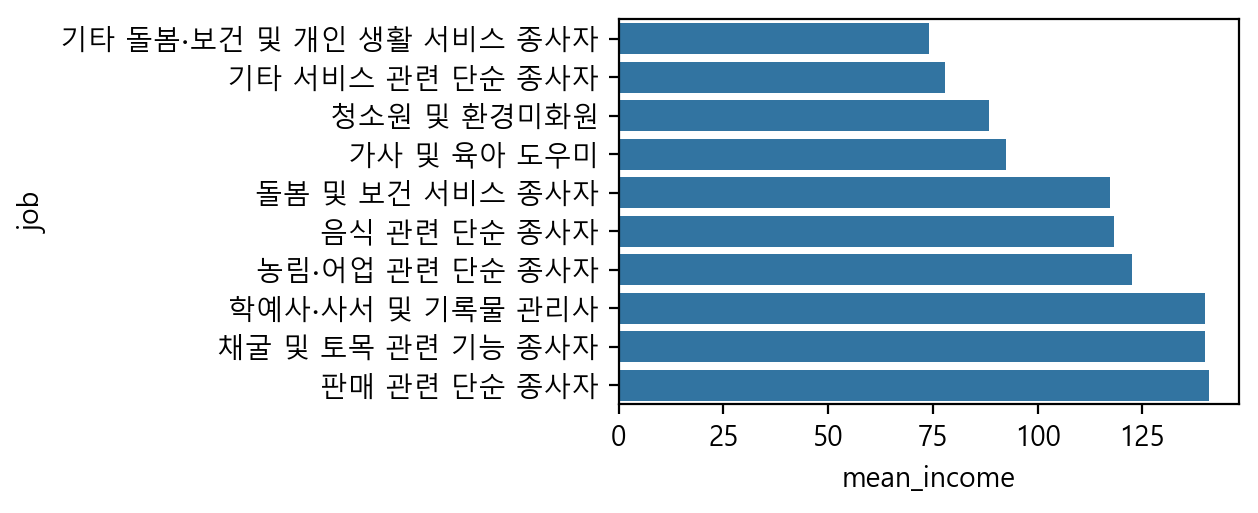

In [272]:
sns.barplot(btm10, x = 'mean_income', y = 'job')

[(0.0, 800.0)]

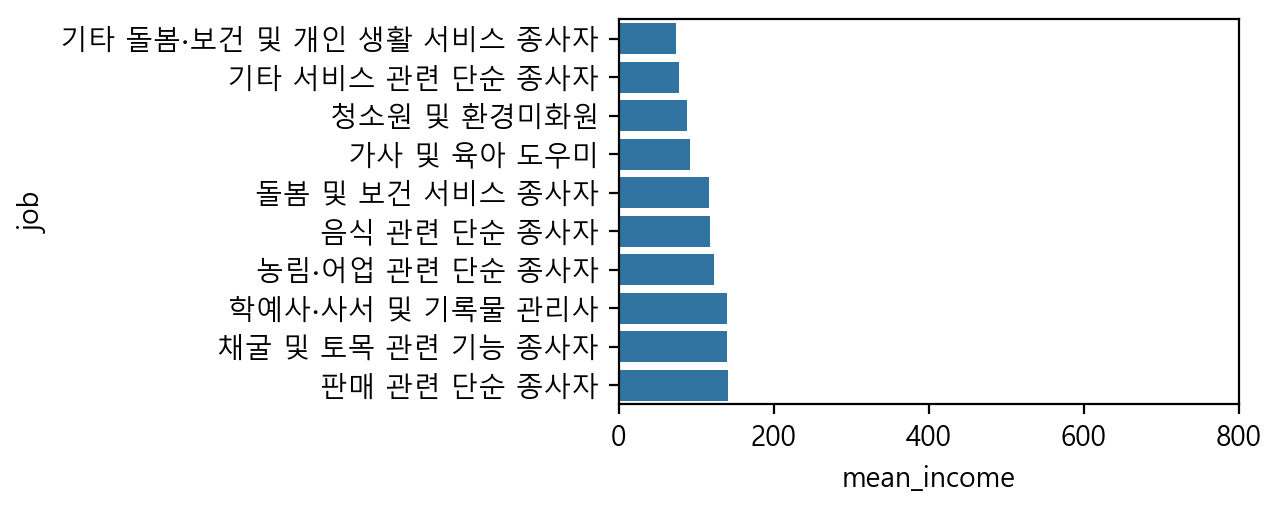

In [273]:
sns.barplot(btm10, x = 'mean_income', y = 'job').set(xlim = [0, 800])

## 성별 직업 빈도

In [274]:
job_male = welfare.dropna(subset = ['job']) \
                  .query('sex == "male"') \
                  .groupby('job', as_index = False) \
                  .agg(n = ('job', 'count')) \
                  .sort_values('n', ascending = False) \
                  .head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [275]:
job_female = welfare.dropna(subset = ['job']) \
                    .query('sex == "female"') \
                    .groupby('job', as_index = False) \
                    .agg(n = ('job', 'count')) \
                    .sort_values('n', ascending = False) \
                    .head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


<Axes: xlabel='n', ylabel='job'>

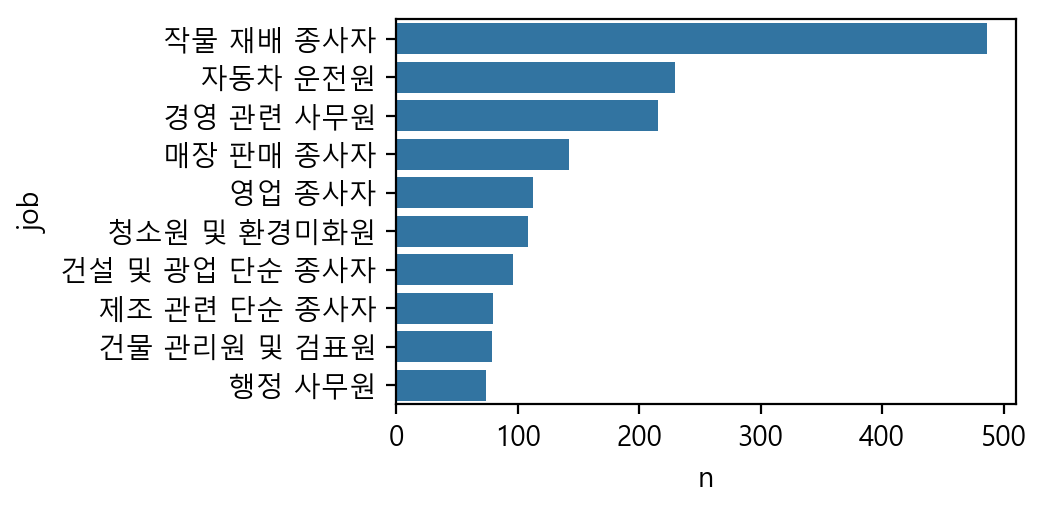

In [276]:
sns.barplot(job_male, y = 'job', x = 'n')

<Axes: xlabel='n', ylabel='job'>

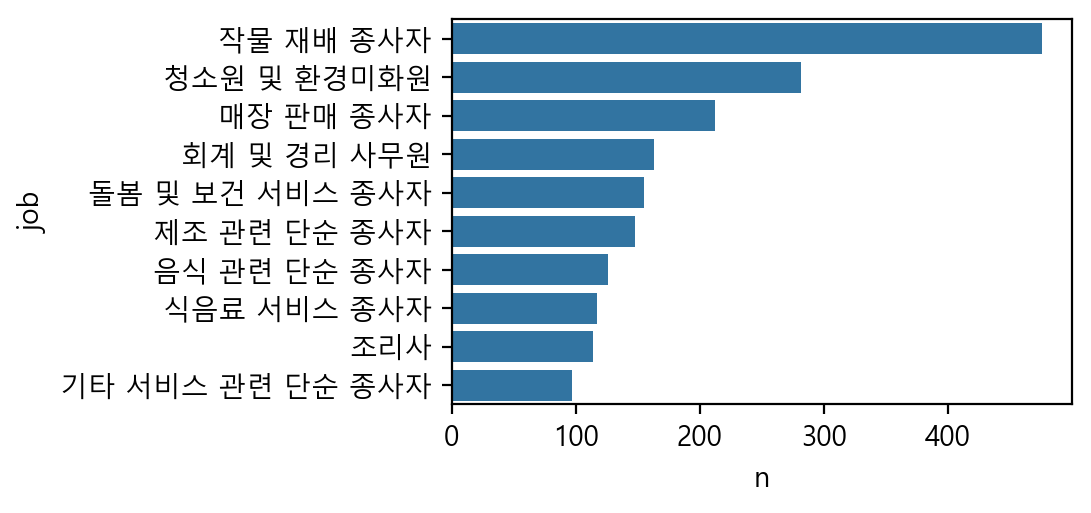

In [277]:
sns.barplot(job_female, y = 'job', x = 'n')

## 종교 유무에 따른 이혼율

In [278]:
welfare['religion'].dtypes

dtype('float64')

In [279]:
welfare['religion'].value_counts()

religion
2.0    7815
1.0    6603
Name: count, dtype: int64

In [280]:
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')
welfare['religion'].value_counts()

religion
no     7815
yes    6603
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

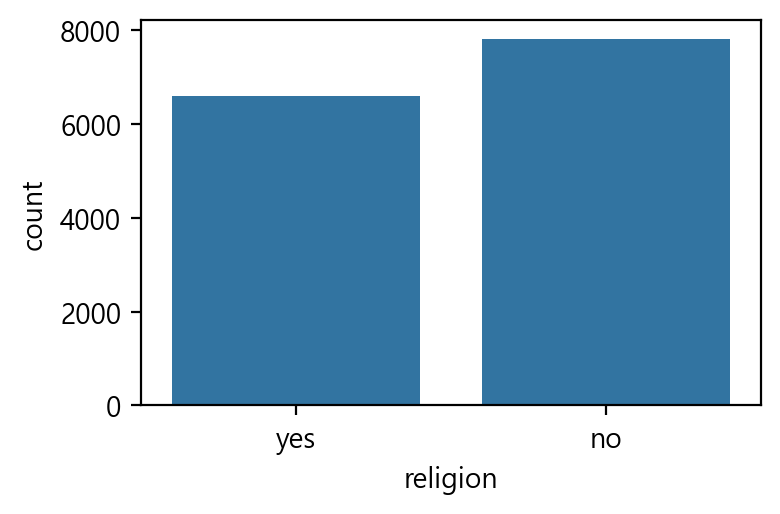

In [281]:
sns.countplot(welfare, x = 'religion')

In [282]:
welfare['marriage_type'].dtypes

dtype('float64')

In [283]:
welfare['marriage_type'].value_counts()

marriage_type
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64

In [284]:
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                      np.where(welfare['marriage_type'] == 3, 'divorce', 'etc'))
welfare['marriage'].head()

0         etc
1         etc
2     divorce
3    marriage
4    marriage
Name: marriage, dtype: object

In [285]:
n_divorce = welfare.groupby('marriage', as_index = False) \
                   .agg( n = ('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<Axes: xlabel='marriage', ylabel='n'>

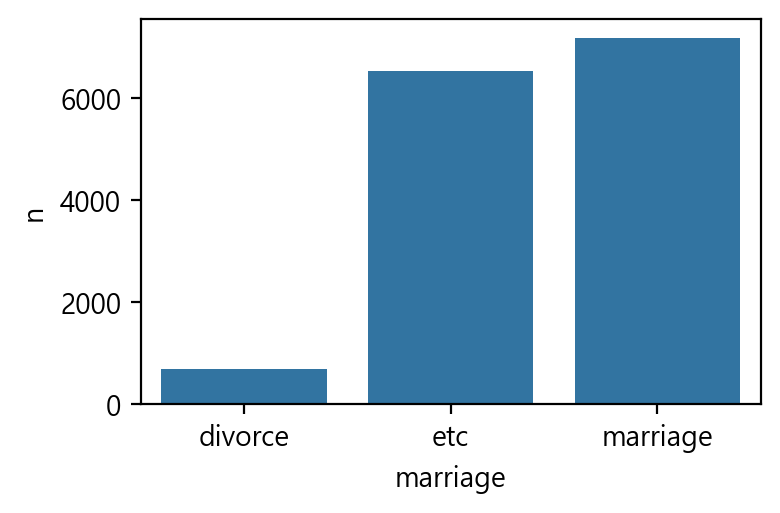

In [286]:
sns.barplot(n_divorce, x = 'marriage', y = 'n')

In [287]:
rel_div = welfare.query('marriage != "etc"') \
                 .groupby('religion', as_index = False) \
                 ['marriage'] \
                 .value_counts(normalize = True)
rel_div

,religion,marriage,proportion
0,no,marriage,0.91
1,no,divorce,0.09
2,yes,marriage,0.92
3,yes,divorce,0.08


In [288]:
rel_div = rel_div.query('marriage == "divorce"') \
                 .assign(proportion = rel_div['proportion'] * 100)
rel_div

,religion,marriage,proportion
1,no,divorce,9.50
3,yes,divorce,7.95


<Axes: xlabel='religion', ylabel='proportion'>

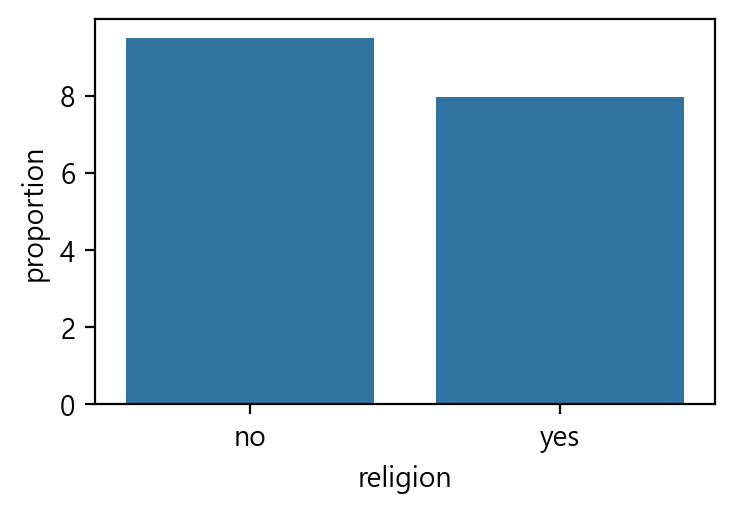

In [289]:
sns.barplot(rel_div, x = 'religion', y = 'proportion')

In [290]:
age_div = welfare.query('marriage != "etc"') \
                 .groupby('ageg', as_index = False) \
                 ['marriage'] \
                 .value_counts(normalize = True)
age_div

,ageg,marriage,proportion
0,middle,marriage,0.92
1,middle,divorce,0.08
2,old,marriage,0.91
3,old,divorce,0.09
4,young,marriage,1.00


In [291]:
welfare.query('marriage != "etc"') \
       .groupby('ageg', as_index = False) \
       ['marriage'] \
       .value_counts()

,ageg,marriage,count
0,middle,marriage,2904
1,middle,divorce,244
2,old,marriage,4280
3,old,divorce,445
4,young,marriage,6


In [292]:
age_div = age_div.query('ageg != "young" & marriage == "divorce"') \
                 .assign(proportion = age_div['proportion'] * 100)
age_div

,ageg,marriage,proportion
1,middle,divorce,7.75
3,old,divorce,9.42


<Axes: xlabel='ageg', ylabel='proportion'>

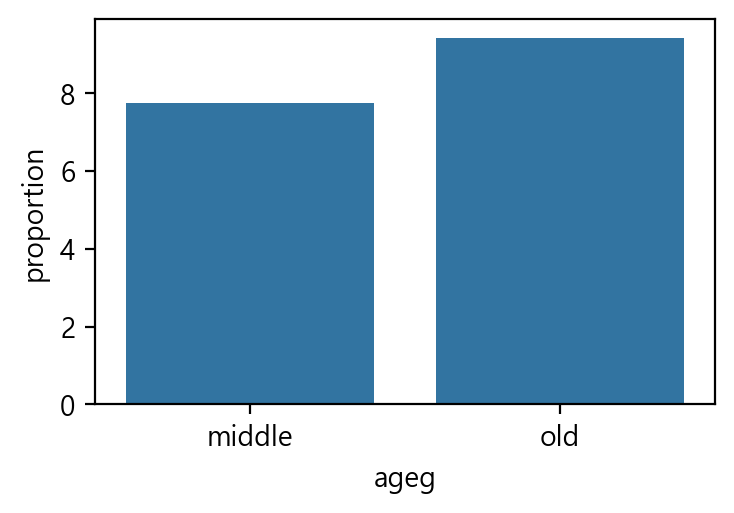

In [293]:
sns.barplot(data = age_div, x = 'ageg', y = 'proportion')

In [294]:
# etc 제외, 초년층 제외
# ageg, religion별 분리
# marriage 추출
# 비율 구하기
age_rel_div = welfare.query('marriage != "etc" & ageg != "young"') \
                     .groupby(['ageg', 'religion'], as_index = False) \
                     ['marriage'] \
                     .value_counts(normalize = True)
           
age_rel_div

,ageg,religion,marriage,proportion
0,middle,no,marriage,0.92
1,middle,no,divorce,0.08
2,middle,yes,marriage,0.93
3,middle,yes,divorce,0.07
4,old,no,marriage,0.89
5,old,no,divorce,0.11
6,old,yes,marriage,0.92
7,old,yes,divorce,0.08


In [295]:
age_rel_div = age_rel_div.query('marriage == "divorce"') \
                         .assign(proportion = age_rel_div['proportion'] * 100)
                         
age_rel_div

,ageg,religion,marriage,proportion
1,middle,no,divorce,8.12
3,middle,yes,divorce,7.19
5,old,no,divorce,10.75
7,old,yes,divorce,8.33


<Axes: xlabel='ageg', ylabel='proportion'>

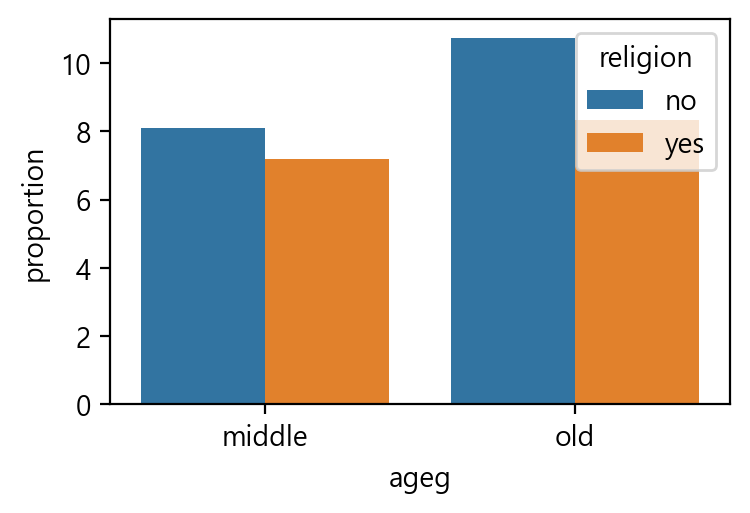

In [296]:
sns.barplot(age_rel_div, x = 'ageg', y = 'proportion', hue = 'religion')

## 지역별 연령대 비율

In [297]:
welfare['code_region'].dtypes

dtype('float64')

In [298]:
welfare['code_region'].value_counts()

code_region
2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: count, dtype: int64

In [300]:
# 지역 코드 목록 만들기
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region'      : ['서울',
                                             '수도권(인천/경기)',
                                             '부산/경남/울산',
                                             '대구/경북',
                                             '대전/충남',
                                             '강원/충북',
                                             '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [302]:
welfare = welfare.merge(list_region, how = 'left')
welfare[['code_region', 'region']].head()

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


In [303]:
welfare[['code_region', 'region']].sample(10)

,code_region,region
13456,3.0,부산/경남/울산
11765,5.0,대전/충남
855,1.0,서울
13058,1.0,서울
5792,2.0,수도권(인천/경기)
6323,2.0,수도권(인천/경기)
6260,2.0,수도권(인천/경기)
13093,2.0,수도권(인천/경기)
554,1.0,서울
14402,6.0,강원/충북


In [304]:
region_ageg = welfare.groupby('region', as_index = False) \
                     ['ageg'] \
                     .value_counts(normalize = True)
region_ageg

,region,ageg,proportion
0,강원/충북,old,0.52
1,강원/충북,middle,0.29
2,강원/충북,young,0.19
3,광주/전남/전북/제주도,old,0.50
4,광주/전남/전북/제주도,middle,0.30
5,광주/전남/전북/제주도,young,0.19
6,대구/경북,old,0.57
7,대구/경북,middle,0.27
8,대구/경북,young,0.16
9,대전/충남,old,0.47


In [305]:
region_ageg = region_ageg.assign(proportion = region_ageg['proportion'] * 100)
region_ageg

,region,ageg,proportion
0,강원/충북,old,51.72
1,강원/충북,middle,29.20
2,강원/충북,young,19.09
3,광주/전남/전북/제주도,old,50.45
4,광주/전남/전북/제주도,middle,30.33
5,광주/전남/전북/제주도,young,19.22
6,대구/경북,old,56.66
7,대구/경북,middle,27.43
8,대구/경북,young,15.91
9,대전/충남,old,46.59


<Axes: xlabel='proportion', ylabel='region'>

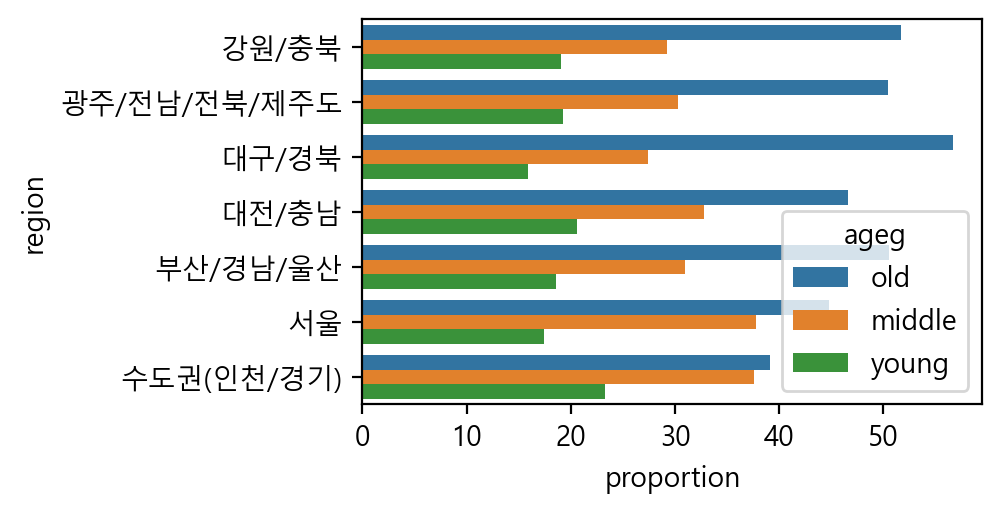

In [306]:
sns.barplot(data = region_ageg, y = 'region', x = 'proportion', hue = 'ageg')

In [313]:
region_ageg[['region', 'ageg', 'proportion']].head()

,region,ageg,proportion
0,강원/충북,old,51.72
1,강원/충북,middle,29.20
2,강원/충북,young,19.09
3,광주/전남/전북/제주도,old,50.45
4,광주/전남/전북/제주도,middle,30.33


## 피봇테이블: 기말시험 가능

In [318]:
piv_df = region_ageg[['region', 'ageg', 'proportion']].pivot(index   = 'region',
                                                             columns = 'ageg',
                                                             values  = 'proportion')
piv_df

ageg,middle,old,young
region,,,
강원/충북,29.20,51.72,19.09
광주/전남/전북/제주도,30.33,50.45,19.22
대구/경북,27.43,56.66,15.91
대전/충남,32.78,46.59,20.63
부산/경남/울산,30.92,50.49,18.59
서울,37.76,44.81,17.43
수도권(인천/경기),37.62,39.09,23.29


<Axes: ylabel='region'>

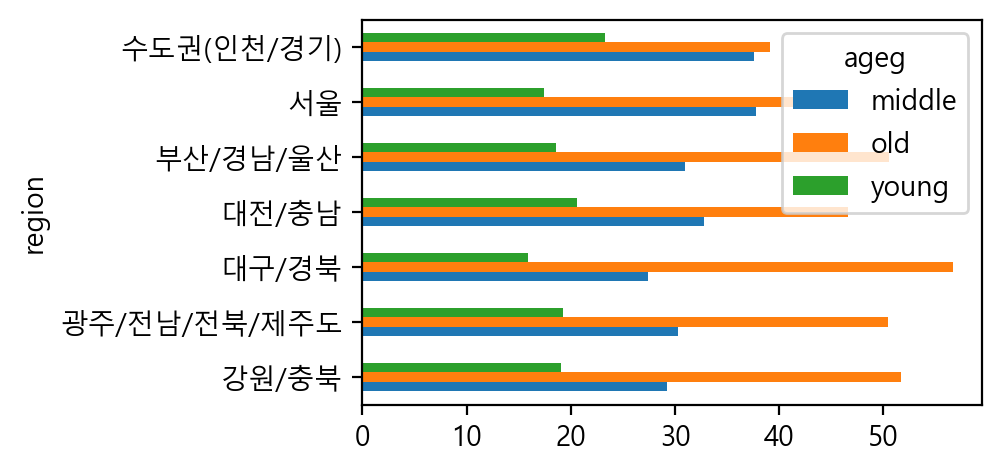

In [320]:
piv_df.plot.barh()

<Axes: ylabel='region'>

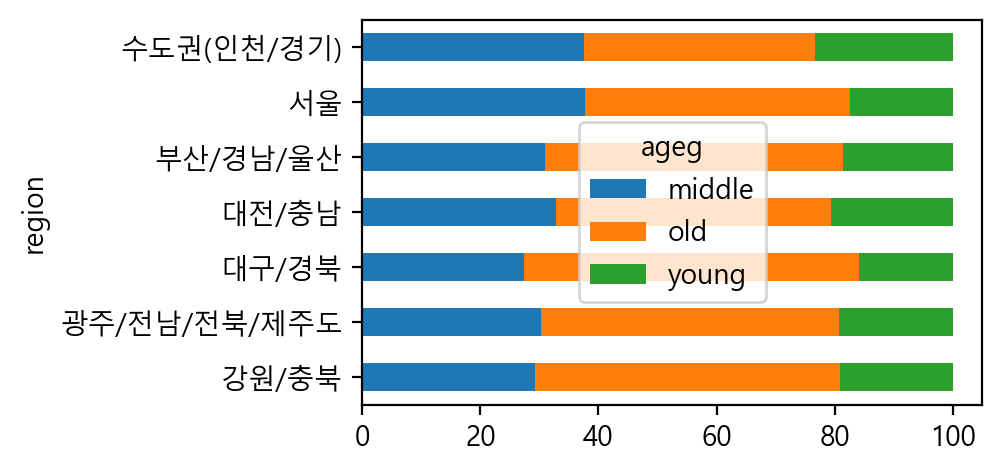

In [322]:
piv_df.plot.barh(stacked = True)

In [323]:
piv_df

ageg,middle,old,young
region,,,
강원/충북,29.20,51.72,19.09
광주/전남/전북/제주도,30.33,50.45,19.22
대구/경북,27.43,56.66,15.91
대전/충남,32.78,46.59,20.63
부산/경남/울산,30.92,50.49,18.59
서울,37.76,44.81,17.43
수도권(인천/경기),37.62,39.09,23.29


In [324]:
piv_df.sort_values('old')[['young', 'middle', 'old']]

ageg,young,middle,old
region,,,
수도권(인천/경기),23.29,37.62,39.09
서울,17.43,37.76,44.81
대전/충남,20.63,32.78,46.59
광주/전남/전북/제주도,19.22,30.33,50.45
부산/경남/울산,18.59,30.92,50.49
강원/충북,19.09,29.20,51.72
대구/경북,15.91,27.43,56.66


In [325]:
reorder_df = piv_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df

ageg,young,middle,old
region,,,
수도권(인천/경기),23.29,37.62,39.09
서울,17.43,37.76,44.81
대전/충남,20.63,32.78,46.59
광주/전남/전북/제주도,19.22,30.33,50.45
부산/경남/울산,18.59,30.92,50.49
강원/충북,19.09,29.20,51.72
대구/경북,15.91,27.43,56.66


<Axes: ylabel='region'>

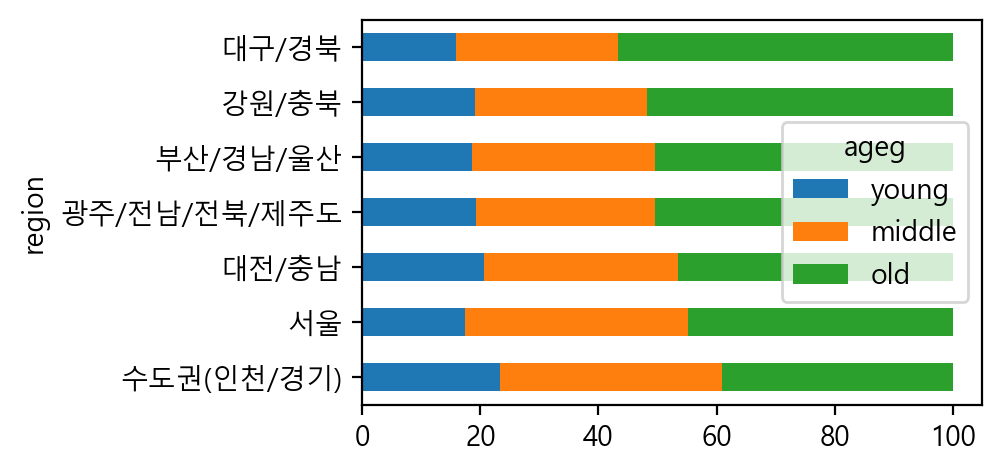

In [326]:
reorder_df.plot.barh(stacked = True)

## 종료